**Implementing Logistic KNN classifier for Diabetes classification**



Reference:

Analyze Important Features of PIMA Indian Database For Diabetes Prediction Using KNN

DOI : 10.32736/sisfokom.v12i1.1598

Jurnal SISFOKOM (Sistem Informasi dan Komputer), Volume 12, Nomor 01, PP, 70-75, 2023


In [2]:
#SEMMA framework
#Sample - Access/Read
#Explore
#Modify
#Model
#Assess


# intelex optimisation


In [3]:
#Data access - Sample stage
import numpy as np


In [205]:
#Import the required libraries
#Data management
import pandas as pd
import numpy as np

In [1]:
# Optional acceleration; safe to skip if unavailable
try:
    from sklearnex import patch_sklearn
    patch_sklearn()
    print("Using sklearnex acceleration.")
except Exception as e:
    print("sklearnex not available or incompatible; continuing with stock scikit-learn.")


sklearnex not available or incompatible; continuing with stock scikit-learn.


In [206]:
#import sampling
from sklearn.model_selection import train_test_split

In [207]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
#Modeling and validation
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [209]:
#Read the data
df = pd.read_csv('diabetes.csv')

**Explore**

Descriptive analytics


In [60]:
#Extension to the paper
#Sample data screening
#Check the data size
#CHeck the data types
#Check the stats

In [61]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,80,0,0,27.1,1.441,57,0
302,5,77,82,41,42,35.8,0.156,35,0
311,0,106,70,37,148,39.4,0.605,22,0
104,2,85,65,0,0,39.6,0.930,27,0
232,1,79,80,25,37,25.4,0.583,22,0


In [62]:
print('Number of records: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of records:  768
Number of columns:  9


In [63]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='Density'>

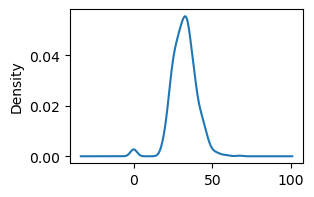

In [65]:
df.BMI.plot.density(figsize = (3,2))

In [66]:
#Visualize for all variables
cols = df.columns
print(cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies



<Axes: title={'center': 'Pregnancies'}, ylabel='Density'>

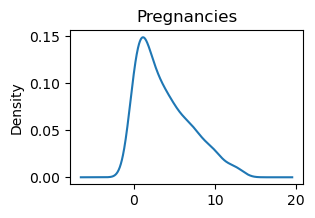

In [79]:
print(cols[0] + "\n")
df[cols[0]].plot.density(figsize = (3,2), title = cols[0])

Glucose



<Axes: title={'center': 'Glucose'}, ylabel='Density'>

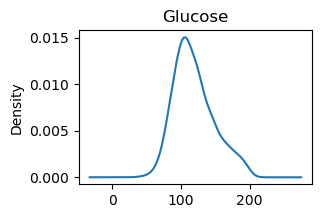

In [81]:
print(cols[1] + "\n")
df[cols[1]].plot.density(figsize = (3,2), title = cols[1])

BloodPressure



<Axes: title={'center': 'BloodPressure'}, ylabel='Density'>

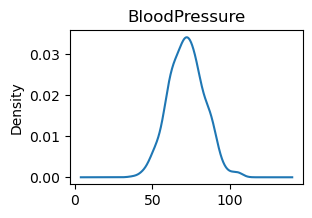

In [82]:
print(cols[2] + "\n")
df[cols[2]].plot.density(figsize = (3,2), title = cols[2])

SkinThickness



<Axes: title={'center': 'SkinThickness'}, ylabel='Density'>

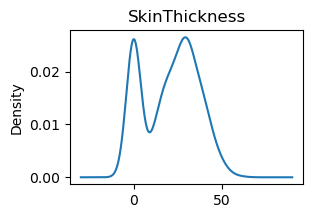

In [83]:
print(cols[3] + "\n")
df[cols[3]].plot.density(figsize = (3,2),title = cols[3])

Insulin



<Axes: ylabel='Density'>

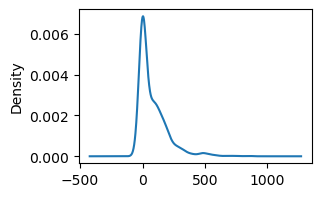

In [71]:
print(cols[4] + "\n")
df[cols[4]].plot.density(figsize = (3,2))

BMI



<Axes: ylabel='Density'>

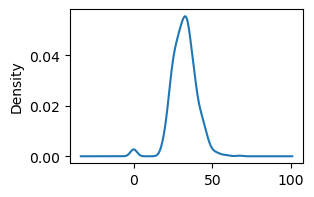

In [72]:
print(cols[5] + "\n")
df[cols[5]].plot.density(figsize = (3,2))

DiabetesPedigreeFunction



<Axes: ylabel='Density'>

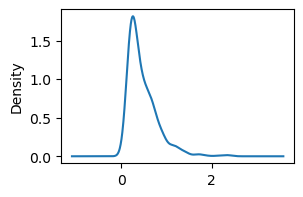

In [73]:
print(cols[6] + "\n")
df[cols[6]].plot.density(figsize = (3,2))

Age



<Axes: ylabel='Density'>

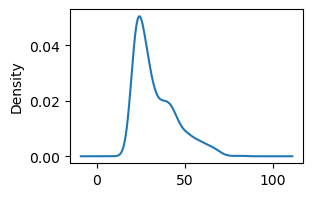

In [74]:
print(cols[7] + "\n")
df[cols[7]].plot.density(figsize = (3,2))

Outcome



<Axes: ylabel='Frequency'>

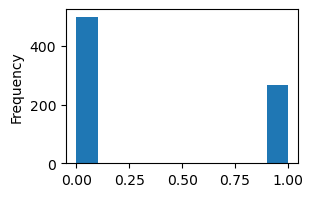

In [75]:
print(cols[8] + "\n")
df[cols[8]].plot.hist(figsize = (3,2))

<Axes: xlabel='Outcome', ylabel='count'>

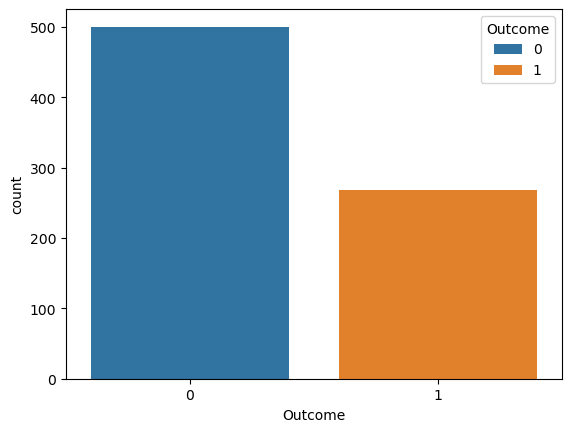

In [76]:
df.groupby(['Outcome'])['Outcome'].count()

# plot the outcome
sns.countplot(x='Outcome', data=df, hue='Outcome')

In [77]:
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

for col in df.columns:
    print(col + ' - ' + str(count_outliers(df, col)))

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_no_outliers = df.copy()
for col in df.columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)

df_no_outliers.shape

df_no_outliers.groupby(['Outcome'])['Outcome'].count()

df = df_no_outliers

Pregnancies - 4
Glucose - 5
BloodPressure - 45
SkinThickness - 1
Insulin - 34
BMI - 19
DiabetesPedigreeFunction - 29
Age - 9
Outcome - 0


<Axes: >

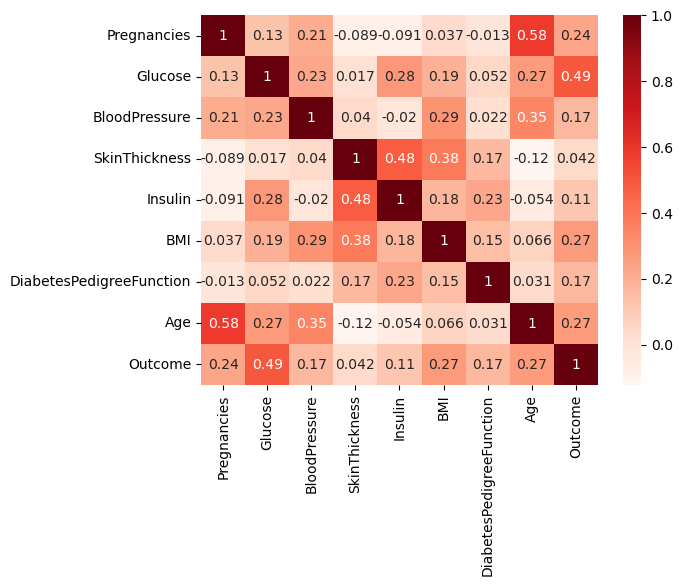

In [36]:
cor = df.corr()
# print(cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [27]:
# sns.pairplot(df)

In [28]:
# sns.pairplot(df, hue = 'Outcome')

**Modify**

In [37]:
df1 = df.copy()


In [38]:
df1.shape

(636, 9)

In [39]:
df1['Outcome'].replace({0:'ND', 1:'D'}, inplace = True)

C:\Users\inven\AppData\Local\Temp\ipykernel_22324\2302552315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Outcome'].replace({0:'ND', 1:'D'}, inplace = True)


In [40]:
df1['Outcome']

0       D
1      ND
2       D
3      ND
5      ND
       ..
763    ND
764    ND
765    ND
766     D
767    ND
Name: Outcome, Length: 636, dtype: object

**Model**

In [41]:
y = df1['Outcome']
X = df1.drop(['Outcome'], axis = 1)

In [42]:
def build_test_model(tsz, X, y, neighbours):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz, random_state = 5)
    #Train the model
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
    knn_model.fit(X_train, y_train)


    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
    return (acc_tr, acc_ts)

# Experimenting Test Size and K sizes

From below testing, there's repeated good results for :
| Test Size | K size |
| --- | --- |
| 0.1 & 0,2 | 7, 9, 19, 21 |

In [46]:
from pprint import pprint

acclist = {}

for i in range(3,22,2):
    for j in np.arange(0.1, 0.6, 0.1):
        acclist[(round(i),round(j,3))] = build_test_model(j, X, y, i)

pprint(sorted(acclist.items(), key = lambda x: x[1][1], reverse = True))

[((7, 0.1), (0.8076923076923077, 0.8125)),
 ((19, 0.2), (0.797244094488189, 0.8046875)),
 ((9, 0.1), (0.8181818181818182, 0.796875)),
 ((21, 0.2), (0.7834645669291339, 0.796875)),
 ((9, 0.2), (0.8169291338582677, 0.7890625)),
 ((15, 0.5), (0.7955974842767296, 0.7830188679245284)),
 ((17, 0.2), (0.8051181102362205, 0.78125)),
 ((19, 0.3), (0.7820224719101123, 0.774869109947644)),
 ((7, 0.2), (0.8110236220472441, 0.7734375)),
 ((7, 0.4), (0.800524934383202, 0.7725490196078432)),
 ((17, 0.4), (0.7952755905511811, 0.7725490196078432)),
 ((19, 0.4), (0.7795275590551181, 0.7725490196078432)),
 ((11, 0.5), (0.7861635220125787, 0.7704402515723271)),
 ((17, 0.3), (0.7752808988764045, 0.7696335078534031)),
 ((21, 0.3), (0.7865168539325843, 0.7696335078534031)),
 ((9, 0.4), (0.7900262467191601, 0.7686274509803922)),
 ((11, 0.4), (0.7952755905511811, 0.7686274509803922)),
 ((13, 0.5), (0.7861635220125787, 0.7672955974842768)),
 ((3, 0.1), (0.8391608391608392, 0.765625)),
 ((5, 0.1), (0.81993006993

In [97]:
from sklearn.metrics import classification_report, auc, roc_curve
df = pd.read_csv('diabetes.csv')

def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

for col in df.columns:
    print(col + ' - ' + str(count_outliers(df, col)))

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_no_outliers = df.copy()
for col in df.columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)

df_no_outliers.shape

df_no_outliers.groupby(['Outcome'])['Outcome'].count()

df = df_no_outliers

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']


def build_test_model(tsz, X, y, neighbours):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz, random_state = 5)
    #Train the model
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
    knn_model.fit(X_train, y_train)


    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
    return (acc_tr, acc_ts, knn_model, cr)

a,b,c,d = build_test_model(0.1, X, y, 7)

print(a,b)
print(d)

Pregnancies - 4
Glucose - 5
BloodPressure - 45
SkinThickness - 1
Insulin - 34
BMI - 19
DiabetesPedigreeFunction - 29
Age - 9
Outcome - 0
0.8076923076923077 0.8125
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.70      0.44      0.54        16

    accuracy                           0.81        64
   macro avg       0.77      0.69      0.71        64
weighted avg       0.80      0.81      0.80        64



# Testing different normalization methods


### Standard Scaler


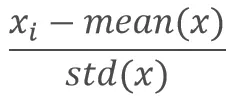

### MinMaxScaler

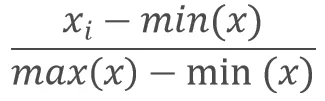

### RobustScaler

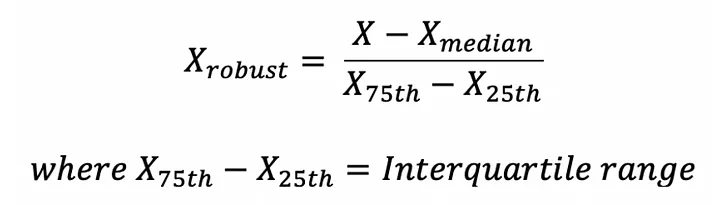

### Normalizer

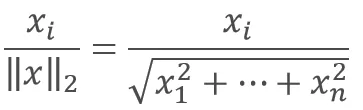

### Quick Comparison

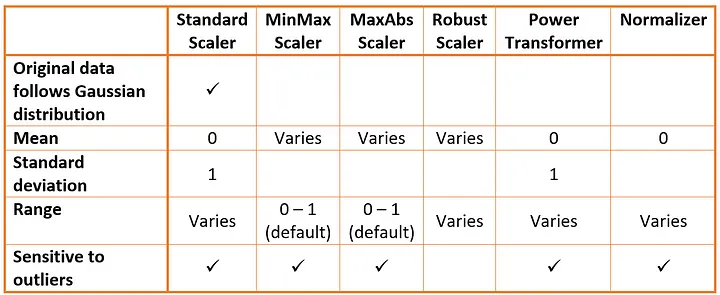

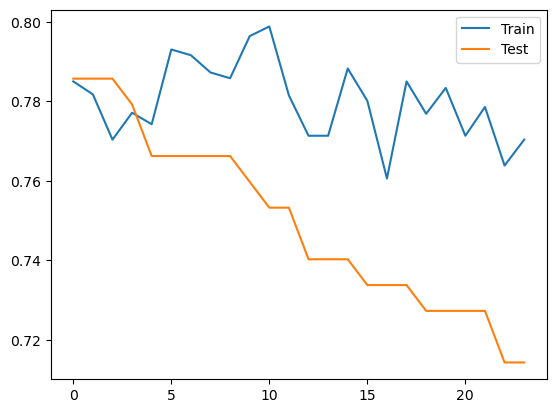

(0, (Normalizer(), 17, 0.2))
		Train: 0.7850162866449512, Test: 0.7857142857142857

(1, (Normalizer(), 19, 0.2))
		Train: 0.7817589576547231, Test: 0.7857142857142857

(2, (Normalizer(), 21, 0.2))
		Train: 0.7703583061889251, Test: 0.7857142857142857

(3, (StandardScaler(), 21, 0.1))
		Train: 0.7771345875542692, Test: 0.7792207792207793

(4, (StandardScaler(), 19, 0.1))
		Train: 0.7742402315484804, Test: 0.7662337662337663

(5, (RobustScaler(), 17, 0.1))
		Train: 0.7930535455861071, Test: 0.7662337662337663

(6, (RobustScaler(), 19, 0.1))
		Train: 0.7916063675832128, Test: 0.7662337662337663

(7, (Normalizer(), 17, 0.1))
		Train: 0.7872648335745297, Test: 0.7662337662337663

(8, (Normalizer(), 19, 0.1))
		Train: 0.7858176555716353, Test: 0.7662337662337663

(9, (RobustScaler(), 17, 0.2))
		Train: 0.7964169381107492, Test: 0.7597402597402597

(10, (RobustScaler(), 21, 0.1))
		Train: 0.7988422575976846, Test: 0.7532467532467533

(11, (Normalizer(), 21, 0.1))
		Train: 0.7814761215629522, 

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

acclist = {}
for scaler in scalers:

    X = scaler.fit_transform(X)
    
    for i in [17,19,21]:
        for j in [0.1, 0.2]:
            acclist[(scaler, i,j)] = build_test_model(j, X, y, i)

sorted_list = sorted(acclist.items(), key = lambda x: x[1][1], reverse = True)

train_nos = [x[1][0] for x in sorted_list]
test_nos = [x[1][1] for x in sorted_list]


plt.plot(train_nos, label = 'Train')
plt.plot(test_nos, label = 'Test')
plt.legend()
plt.show()

for inst in enumerate(sorted_list):
    print(f"{inst[0], inst[1][0]}")
    print(f"\t\tTrain: {inst[1][1][0]}, Test: {inst[1][1][1]}")
    print()

    # Add om [resemtatoin and hightlight the the intersection ]

# Results:

from below testing with 4 kinds of normalization methods:
1. MinMaxScaler
2. StandardScaler
3. RobustScaler
4. Normalizer

We can see that MinMaxScaler and StandardScaler give the best results.
| Normalization Method | Test Size | K size |
| --- | --- | --- |
| Standard Scaler| 0.1 | 21 | 
| Standard Scaler | 0.1 | 19 |
| Robust Scaler | 0.1 | 21 |



# Overall Experimentation Results:

Parameters of experimentation:
- Test Size
- K size
- Normalization Method (4 methods: MinMaxScaler, StandardScaler, RobustScaler, Normalizer)

The Best results are:
| Scaling Method | Test Size | K size | Testing Accuracy |
| --- | --- | --- | --- |
| No Scaling | 0.1 | 17 | 0.8181 |
| Min Max Scaling | 0.1 | 17 | 0.8181 |
| Standard Scaling | 0.1 | 17 | 0.8311 |

# Conclusion

From the above experimentation, we can conclude the following:

1. Scaling: Standard Scaler
2. Test Size: 0.1
3. K size: 18
4. Testing Accuracy: 0.8311688311688312

Note: using `random_state = 5` in the `train_test_split` function for reproducibility of the above numbers.


LOG: Now Testing (StandardScaler(), 3, 0.1)
LOG: Now Testing (StandardScaler(), 3, 0.2)
LOG: Now Testing (StandardScaler(), 3, 0.3)
LOG: Now Testing (StandardScaler(), 3, 0.4)
LOG: Now Testing (StandardScaler(), 3, 0.5)
LOG: Now Testing (StandardScaler(), 5, 0.1)
LOG: Now Testing (StandardScaler(), 5, 0.2)
LOG: Now Testing (StandardScaler(), 5, 0.3)
LOG: Now Testing (StandardScaler(), 5, 0.4)
LOG: Now Testing (StandardScaler(), 5, 0.5)
LOG: Now Testing (StandardScaler(), 7, 0.1)
LOG: Now Testing (StandardScaler(), 7, 0.2)
LOG: Now Testing (StandardScaler(), 7, 0.3)
LOG: Now Testing (StandardScaler(), 7, 0.4)
LOG: Now Testing (StandardScaler(), 7, 0.5)
LOG: Now Testing (StandardScaler(), 9, 0.1)
LOG: Now Testing (StandardScaler(), 9, 0.2)
LOG: Now Testing (StandardScaler(), 9, 0.3)
LOG: Now Testing (StandardScaler(), 9, 0.4)
LOG: Now Testing (StandardScaler(), 9, 0.5)
LOG: Now Testing (StandardScaler(), 11, 0.1)
LOG: Now Testing (StandardScaler(), 11, 0.2)
LOG: Now Testing (StandardScal

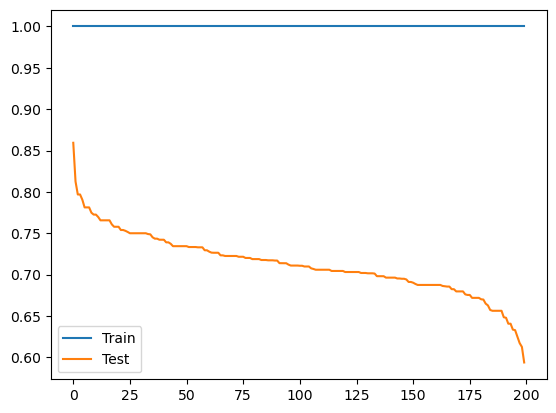

(0, (MinMaxScaler(), 17, 0.1))
		Train: 1.0, Test: 0.859375

(1, (MinMaxScaler(), 19, 0.1))
		Train: 1.0, Test: 0.8125

(2, (StandardScaler(), 9, 0.1))
		Train: 1.0, Test: 0.796875

(3, (StandardScaler(), 13, 0.1))
		Train: 1.0, Test: 0.796875

(4, (MinMaxScaler(), 13, 0.3))
		Train: 1.0, Test: 0.7905759162303665

(5, (StandardScaler(), 19, 0.1))
		Train: 1.0, Test: 0.78125

(6, (MinMaxScaler(), 15, 0.2))
		Train: 1.0, Test: 0.78125

(7, (RobustScaler(), 9, 0.2))
		Train: 1.0, Test: 0.78125

(8, (RobustScaler(), 11, 0.3))
		Train: 1.0, Test: 0.774869109947644

(9, (MinMaxScaler(), 21, 0.4))
		Train: 1.0, Test: 0.7725490196078432

(10, (Normalizer(), 19, 0.4))
		Train: 1.0, Test: 0.7725490196078432

(11, (StandardScaler(), 17, 0.3))
		Train: 1.0, Test: 0.7696335078534031

(12, (MinMaxScaler(), 5, 0.1))
		Train: 1.0, Test: 0.765625

(13, (MinMaxScaler(), 15, 0.1))
		Train: 1.0, Test: 0.765625

(14, (RobustScaler(), 17, 0.2))
		Train: 1.0, Test: 0.765625

(15, (Normalizer(), 9, 0.1))
		Tr

In [98]:
df2 = df.copy()

y = df2['Outcome']
X = df2.drop(['Outcome'], axis = 1)

from sklearn.tree import DecisionTreeClassifier

def build_test_model(tsz, X, y, neighbours):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    knn_model = DecisionTreeClassifier()
    knn_model.fit(X_train, y_train)


    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
    return (acc_tr, acc_ts, knn_model, cr)


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

acclist = {}
for scaler in scalers:

    X = scaler.fit_transform(X)
    
    for i in range(3,22,2):
        for j in np.arange(0.1, 0.6, 0.1):
            acclist[(scaler, round(i),round(j,3))] = build_test_model(j, X, y, i)
            print("LOG: Now Testing", (scaler, round(i),round(j,3)))
    
sorted_list = sorted(acclist.items(), key = lambda x: x[1][1], reverse = True)

train_nos = [x[1][0] for x in sorted_list] 

test_nos = [x[1][1] for x in sorted_list]

plt.plot(train_nos, label = 'Train')
plt.plot(test_nos, label = 'Test')
plt.legend()
plt.show()

for inst in enumerate(sorted_list):
    print(f"{inst[0], inst[1][0]}")
    print(f"\t\tTrain: {inst[1][1][0]}, Test: {inst[1][1][1]}")
    print()

In [199]:
from sklearn.metrics import classification_report

df = pd.read_csv('diabetes.csv')

def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

for col in df.columns:
    print(col + ' - ' + str(count_outliers(df, col)))

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_no_outliers = df.copy()
for col in df.columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)

df = df_no_outliers.copy()

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']


# def build_test_model(tsz, X, y):

#     X = MinMaxScaler().fit_transform(X)
    
#     #Create training-testing data sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
#     #Train the model
#     knn_model = DecisionTreeClassifier()
#     knn_model.fit(X_train, y_train)


#     #Validate on training
#     y_pred_tr = knn_model.predict(X_train)
#     cm_tr = confusion_matrix(y_train, y_pred_tr)
#     acc_tr = accuracy_score (y_train, y_pred_tr)

#     #Validate on testing
#     y_pred_ts = knn_model.predict(X_test)
#     cm_ts = confusion_matrix(y_test, y_pred_ts)
#     acc_ts = accuracy_score (y_test, y_pred_ts)

#     cr = classification_report(y_test, y_pred_ts)

#     # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
#     return (acc_tr, acc_ts, knn_model, cr)

def build_test_model(tsz, X, y):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    knn_model = DecisionTreeClassifier()
    knn_model.fit(X_train, y_train)


    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
    return (acc_tr, acc_ts, knn_model, cr)

a,b,c,d = build_test_model(0.1, X, y)

print(a,b)
print(d)

Pregnancies - 4
Glucose - 5
BloodPressure - 45
SkinThickness - 1
Insulin - 34
BMI - 19
DiabetesPedigreeFunction - 29
Age - 9
Outcome - 0
1.0 0.8125
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        52
           1       0.50      0.83      0.62        12

    accuracy                           0.81        64
   macro avg       0.73      0.82      0.75        64
weighted avg       0.87      0.81      0.83        64



Pregnancies - 4
Glucose - 5
BloodPressure - 45
SkinThickness - 1
Insulin - 34
BMI - 19
DiabetesPedigreeFunction - 29
Age - 9
Outcome - 0
0.8076923076923077 0.8125
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.70      0.44      0.54        16

    accuracy                           0.81        64
   macro avg       0.77      0.69      0.71        64
weighted avg       0.80      0.81      0.80        64



LOG: Now Testing (StandardScaler(), 3, 0.1)
LOG: Now Testing (StandardScaler(), 3, 0.2)
LOG: Now Testing (StandardScaler(), 3, 0.3)
LOG: Now Testing (StandardScaler(), 3, 0.4)
LOG: Now Testing (StandardScaler(), 3, 0.5)
LOG: Now Testing (StandardScaler(), 5, 0.1)
LOG: Now Testing (StandardScaler(), 5, 0.2)
LOG: Now Testing (StandardScaler(), 5, 0.3)
LOG: Now Testing (StandardScaler(), 5, 0.4)
LOG: Now Testing (StandardScaler(), 5, 0.5)
LOG: Now Testing (StandardScaler(), 7, 0.1)
LOG: Now Testing (StandardScaler(), 7, 0.2)
LOG: Now Testing (StandardScaler(), 7, 0.3)
LOG: Now Testing (StandardScaler(), 7, 0.4)
LOG: Now Testing (StandardScaler(), 7, 0.5)
LOG: Now Testing (StandardScaler(), 9, 0.1)
LOG: Now Testing (StandardScaler(), 9, 0.2)
LOG: Now Testing (StandardScaler(), 9, 0.3)
LOG: Now Testing (StandardScaler(), 9, 0.4)
LOG: Now Testing (StandardScaler(), 9, 0.5)
LOG: Now Testing (StandardScaler(), 11, 0.1)
LOG: Now Testing (StandardScaler(), 11, 0.2)
LOG: Now Testing (StandardScal

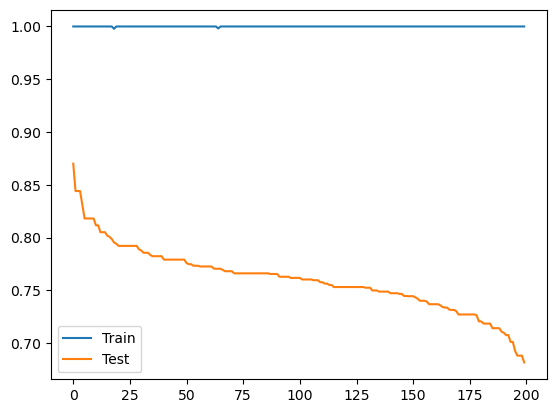

(0, (StandardScaler(), 13, 0.1))
		Train: 1.0, Test: 0.8701298701298701

(1, (StandardScaler(), 17, 0.1))
		Train: 1.0, Test: 0.8441558441558441

(2, (MinMaxScaler(), 15, 0.1))
		Train: 1.0, Test: 0.8441558441558441

(3, (RobustScaler(), 19, 0.1))
		Train: 1.0, Test: 0.8441558441558441

(4, (RobustScaler(), 15, 0.1))
		Train: 1.0, Test: 0.8311688311688312

(5, (StandardScaler(), 19, 0.1))
		Train: 1.0, Test: 0.8181818181818182

(6, (MinMaxScaler(), 9, 0.2))
		Train: 1.0, Test: 0.8181818181818182

(7, (MinMaxScaler(), 17, 0.1))
		Train: 1.0, Test: 0.8181818181818182

(8, (MinMaxScaler(), 21, 0.2))
		Train: 1.0, Test: 0.8181818181818182

(9, (Normalizer(), 15, 0.2))
		Train: 1.0, Test: 0.8181818181818182

(10, (StandardScaler(), 13, 0.2))
		Train: 1.0, Test: 0.8116883116883117

(11, (MinMaxScaler(), 3, 0.2))
		Train: 1.0, Test: 0.8116883116883117

(12, (StandardScaler(), 7, 0.1))
		Train: 1.0, Test: 0.8051948051948052

(13, (StandardScaler(), 15, 0.1))
		Train: 1.0, Test: 0.8051948051948

In [213]:
df2 = df.copy()

y = df2['Outcome']
X = df2.drop(['Outcome'], axis = 1)

from sklearn.ensemble import RandomForestClassifier

def build_test_model(tsz, X, y, neighbours):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    knn_model = RandomForestClassifier()
    knn_model.fit(X_train, y_train)


    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
    return (acc_tr, acc_ts, knn_model, cr)


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

acclist = {}
for scaler in scalers:

    X = scaler.fit_transform(X)
    
    for i in range(3,22,2):
        for j in np.arange(0.1, 0.6, 0.1):
            acclist[(scaler, round(i),round(j,3))] = build_test_model(j, X, y, i)
            print("LOG: Now Testing", (scaler, round(i),round(j,3)))
    
sorted_list = sorted(acclist.items(), key = lambda x: x[1][1], reverse = True)

train_nos = [x[1][0] for x in sorted_list] 

test_nos = [x[1][1] for x in sorted_list]

plt.plot(train_nos, label = 'Train')
plt.plot(test_nos, label = 'Test')
plt.legend()
plt.show()

for inst in enumerate(sorted_list):
    print(f"{inst[0], inst[1][0]}")
    print(f"\t\tTrain: {inst[1][1][0]}, Test: {inst[1][1][1]}")
    print()

In [222]:
print(sorted_list[0][1][3])

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        57
           1       0.78      0.70      0.74        20

    accuracy                           0.87        77
   macro avg       0.84      0.81      0.83        77
weighted avg       0.87      0.87      0.87        77



LOG: Now Testing (StandardScaler(), 3, 0.1)
LOG: Now Testing (StandardScaler(), 3, 0.2)
LOG: Now Testing (StandardScaler(), 3, 0.3)
LOG: Now Testing (StandardScaler(), 3, 0.4)
LOG: Now Testing (StandardScaler(), 3, 0.5)
LOG: Now Testing (StandardScaler(), 5, 0.1)
LOG: Now Testing (StandardScaler(), 5, 0.2)
LOG: Now Testing (StandardScaler(), 5, 0.3)
LOG: Now Testing (StandardScaler(), 5, 0.4)
LOG: Now Testing (StandardScaler(), 5, 0.5)
LOG: Now Testing (StandardScaler(), 7, 0.1)
LOG: Now Testing (StandardScaler(), 7, 0.2)
LOG: Now Testing (StandardScaler(), 7, 0.3)
LOG: Now Testing (StandardScaler(), 7, 0.4)
LOG: Now Testing (StandardScaler(), 7, 0.5)
LOG: Now Testing (StandardScaler(), 9, 0.1)
LOG: Now Testing (StandardScaler(), 9, 0.2)
LOG: Now Testing (StandardScaler(), 9, 0.3)
LOG: Now Testing (StandardScaler(), 9, 0.4)
LOG: Now Testing (StandardScaler(), 9, 0.5)
LOG: Now Testing (StandardScaler(), 11, 0.1)
LOG: Now Testing (StandardScaler(), 11, 0.2)
LOG: Now Testing (StandardScal

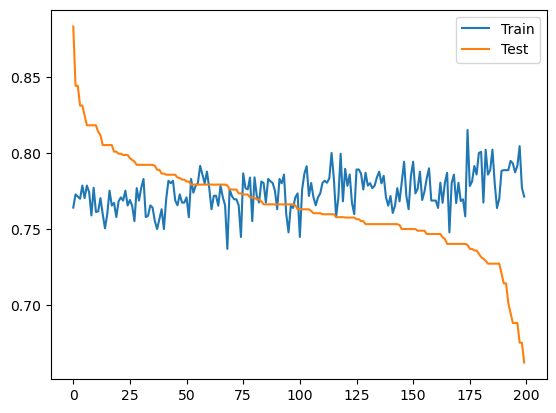

(0, (MinMaxScaler(), 19, 0.1))
		Train: 0.76410998552822, Test: 0.8831168831168831

(1, (MinMaxScaler(), 7, 0.1))
		Train: 0.7727930535455861, Test: 0.8441558441558441

(2, (MinMaxScaler(), 11, 0.1))
		Train: 0.7713458755426917, Test: 0.8441558441558441

(3, (MinMaxScaler(), 5, 0.1))
		Train: 0.7698986975397974, Test: 0.8311688311688312

(4, (RobustScaler(), 11, 0.1))
		Train: 0.7785817655571635, Test: 0.8311688311688312

(5, (StandardScaler(), 21, 0.2))
		Train: 0.7703583061889251, Test: 0.8246753246753247

(6, (StandardScaler(), 7, 0.1))
		Train: 0.7785817655571635, Test: 0.8181818181818182

(7, (StandardScaler(), 9, 0.1))
		Train: 0.7742402315484804, Test: 0.8181818181818182

(8, (MinMaxScaler(), 21, 0.2))
		Train: 0.758957654723127, Test: 0.8181818181818182

(9, (RobustScaler(), 21, 0.1))
		Train: 0.7771345875542692, Test: 0.8181818181818182

(10, (Normalizer(), 13, 0.1))
		Train: 0.7612156295224313, Test: 0.8181818181818182

(11, (StandardScaler(), 13, 0.3))
		Train: 0.76163873370

In [223]:
df2 = df.copy()

y = df2['Outcome']
X = df2.drop(['Outcome'], axis = 1)

from sklearn.linear_model import LogisticRegression

def build_test_model(tsz, X, y, neighbours):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    knn_model = LogisticRegression()
    knn_model.fit(X_train, y_train)


    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    # return (cm_tr, acc_tr, cm_ts, acc_ts, cr)
    return (acc_tr, acc_ts, knn_model, cr)


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

acclist = {}
for scaler in scalers:

    X = scaler.fit_transform(X)
    
    for i in range(3,22,2):
        for j in np.arange(0.1, 0.6, 0.1):
            acclist[(scaler, round(i),round(j,3))] = build_test_model(j, X, y, i)
            print("LOG: Now Testing", (scaler, round(i),round(j,3)))
    
sorted_list = sorted(acclist.items(), key = lambda x: x[1][1], reverse = True)

train_nos = [x[1][0] for x in sorted_list] 

test_nos = [x[1][1] for x in sorted_list]

plt.plot(train_nos, label = 'Train')
plt.plot(test_nos, label = 'Test')
plt.legend()
plt.show()

for inst in enumerate(sorted_list):
    print(f"{inst[0], inst[1][0]}")
    print(f"\t\tTrain: {inst[1][1][0]}, Test: {inst[1][1][1]}")
    print()

In [224]:
print(sorted_list[0][1][3])

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        51
           1       0.90      0.73      0.81        26

    accuracy                           0.88        77
   macro avg       0.89      0.85      0.86        77
weighted avg       0.89      0.88      0.88        77



<Figure size 640x480 with 0 Axes>

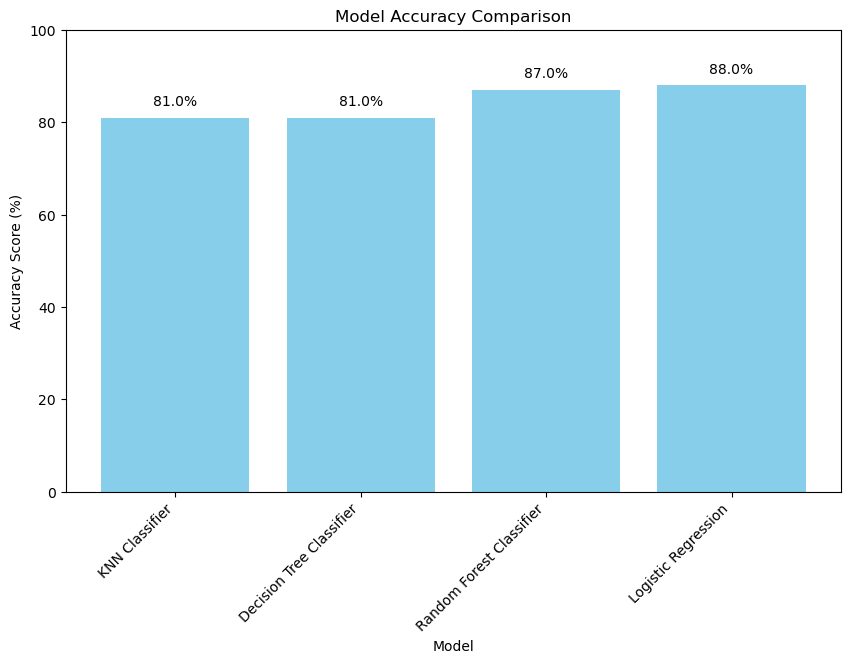

In [228]:
import matplotlib.pyplot as plt

def plot_model_accuracy(data):
  """
  Generates a bar graph of model accuracy scores.

  Args:
    data: A list of tuples, where each tuple contains the model name and its accuracy score.
  """

  models, accuracies = zip(*data)
  accuracies = [float(score.replace('%', '')) for score in accuracies]  # Convert to numerical values

  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  plt.bar(models, accuracies, color='skyblue')
  plt.xlabel("Model")
  plt.ylabel("Accuracy Score (%)")
  plt.title("Model Accuracy Comparison")
  plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

  # Add accuracy values on top of the bars
  for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(v) + "%", ha='center', va='bottom')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Example usage:
data = [
  ("KNN Classifier", "81%"),
  ("Decision Tree Classifier", "81%"),
  ("Random Forest Classifier", "87%"),
  ("Logistic Regression", "88%"),
]

plot_model_accuracy(data)